## Recognizing hand-written digits with SVM

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics
import numpy as np

## Load the digits data set

In [3]:
digits=datasets.load_digits()

In [4]:
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [8]:
print(len(digits['images']))
print(digits)

1797
{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12

In [10]:
print(digits['images'])

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

In [12]:
digits['images'].shape[1:]

(8, 8)

In [14]:
digits['images'].shape[0]

1797

In [20]:
digits['target'].tolist()


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 9,
 5,
 5,
 6,
 5,
 0,
 9,
 8,
 9,
 8,
 4,
 1,
 7,
 7,
 3,
 5,
 1,
 0,
 0,
 2,
 2,
 7,
 8,
 2,
 0,
 1,
 2,
 6,
 3,
 3,
 7,
 3,
 3,
 4,
 6,
 6,
 6,
 4,
 9,
 1,
 5,
 0,
 9,
 5,
 2,
 8,
 2,
 0,
 0,
 1,
 7,
 6,
 3,
 2,
 1,
 7,
 4,
 6,
 3,
 1,
 3,
 9,
 1,
 7,
 6,
 8,
 4,
 3,
 1,
 4,
 0,
 5,
 3,
 6,
 9,
 6,
 1,
 7,
 5,
 4,
 4,
 7,
 2,
 8,
 2,
 2,
 5,
 7,
 9,
 5,
 4,
 8,
 8,
 4,
 9,
 0,
 8,
 9,
 8,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 9,
 5,
 5,
 6,
 5,
 0,
 9,
 8,
 9,
 8,
 4,
 1,
 7,
 7,
 3,
 5,
 1,
 0,
 0,
 2,
 2,
 7,
 8,
 2,
 0,
 1,
 2,
 6,
 3,
 3,
 7,
 3,
 3,
 4,
 6,
 6,
 6,
 4,
 9,
 1,
 5,
 0,
 9,
 5,
 2,
 8,
 2,
 0,
 0,
 1,
 7,
 6,
 3,
 2,
 1,
 7,
 3,
 1,
 3,
 9,
 1,
 7,
 6,
 8,
 4,
 3,
 1,
 4,
 0,
 5,
 3,
 6,
 9,
 6,
 1,
 7,
 5,
 4,
 4,
 7,
 2,
 8,
 2,
 2,
 5,
 5,
 4,
 8,
 8,


Text(0.5,1,'Target is 1')

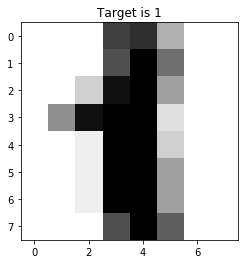

In [21]:
plt.imshow(digits['images'][1],cmap=plt.cm.gray_r)
plt.title("Target is {0}".format(digits['target'][1]))

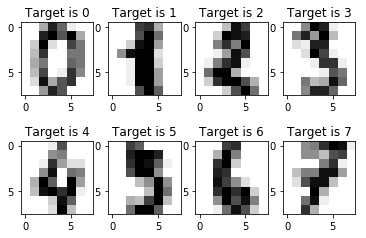

In [26]:
for i in range(1,9):
    plt.subplot(2,4,i)
    plt.imshow(digits['images'][i-1],cmap=plt.cm.gray_r)
    plt.title("Target is {0}".format(digits['target'][i-1]))

In [34]:
import numpy as np
a=np.array([[2,3],[4,5]])
print(a)
b=a.reshape(1,-1)
b

[[2 3]
 [4 5]]


array([[2, 3, 4, 5]])

In [37]:
data=digits.images.reshape(len(digits.images),-1)
data.shape

(1797, 64)

In [38]:
classifier=svm.SVC(kernel='linear')

In [39]:
split_val=1000
X_train,X_test=data[:1000],data[1000:]
Y_train,Y_test=digits.target[:1000],digits.target[1000:]

In [49]:
from sklearn.svm import SVC
SVCClassifier=SVC(kernel='linear')
SVCModel=SVCClassifier.fit(X_train,Y_train)
predict=SVCModel.predict(X_test)
cm=metrics.confusion_matrix(Y_test, predict)
cm

array([[78,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 71,  0,  0,  0,  0,  0,  0,  3,  6],
       [ 1,  0, 76,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 66,  0,  3,  0,  3,  7,  0],
       [ 1,  0,  0,  0, 78,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 81,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 79,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  2,  0, 76,  1,  0],
       [ 0,  1,  0,  1,  0,  2,  0,  1, 71,  0],
       [ 1,  0,  0,  1,  0,  3,  0,  1,  0, 75]])

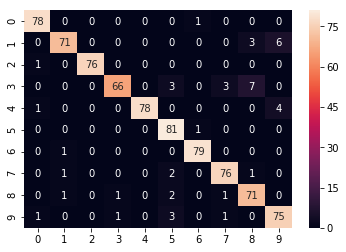

In [52]:
import seaborn as sb
sb.heatmap(cm,annot=True)

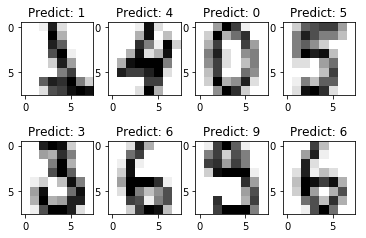

In [66]:
for i in range(0,8):
    plt.subplot(2,4,i+1)
    plt.imshow(digits['images'][i+1000],cmap=plt.cm.gray_r) #X-test values data[:1000]
    plt.title("Predict: {0}".format(predict[i]))

In [65]:
SVCModel.score(X_test, Y_test)

0.9422835633626098